In [14]:
# Aykırı değer analiz kodu
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Veri setinin yüklenmesi
df = pd.read_csv("maindataset.csv")

# Aykırı değer analizinde kullanılacak sütunların belirlenmesi
numerik_stnlar = ['Height', 'Weight']

# Aykırı değer değer analizini yapan fonksiyonun tanımlanması
def IQR_ileAykiriDegerHesaplama(veri, stn):
    Q1 = veri[stn].quantile(0.25)
    Q3 = veri[stn].quantile(0.75)
    IQR = Q3 - Q1
    if (stn == 'Height'):
        katsayi = 6
    else:
        katsayi = 1
    alt_sinir = Q1 -katsayi * IQR
    ust_sinir = Q3 + katsayi * IQR
    return veri[(veri[stn] < alt_sinir) | (veri[stn] > ust_sinir)]

# Belirlenen aykırı değerlerin verisetinden atılması
aykiri_degerler = pd.DataFrame()
for stnlar in numerik_stnlar:
    aykiri_degerler = pd.concat([aykiri_degerler, IQR_ileAykiriDegerHesaplama(df, stnlar)])

# Aykırı değerlerin olduğu verisetinden birbirinin kopyası olan satırların atılması
aykiri_degerler = aykiri_degerler.drop_duplicates()

# IQR ile analiz edilmiş verisetinden kopya olan sütunların atılması
temizlenmis_veriseti = df.drop(aykiri_degerler.index)

# Verisetlerinin .csv dosyası olarak kaydedilmesi
aykiri_degerler.to_csv("AykiriDegerler.csv", index=False)
temizlenmis_veriseti.to_csv("TemizlenmisData.csv", index=False)


Sınıf: Normal_Weight
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.892344  0.641026    0.446429  0.526316
Lojistik Regresyon  0.880383  0.687500    0.196429  0.305556
Karar Ağaçları      0.959330  0.882353    0.803571  0.841121
Random Forest       0.944976  0.823529    0.750000  0.785047
SVM                 0.894737  0.676471    0.410714  0.511111
Naive Bayes         0.880383  0.588235    0.357143  0.444444


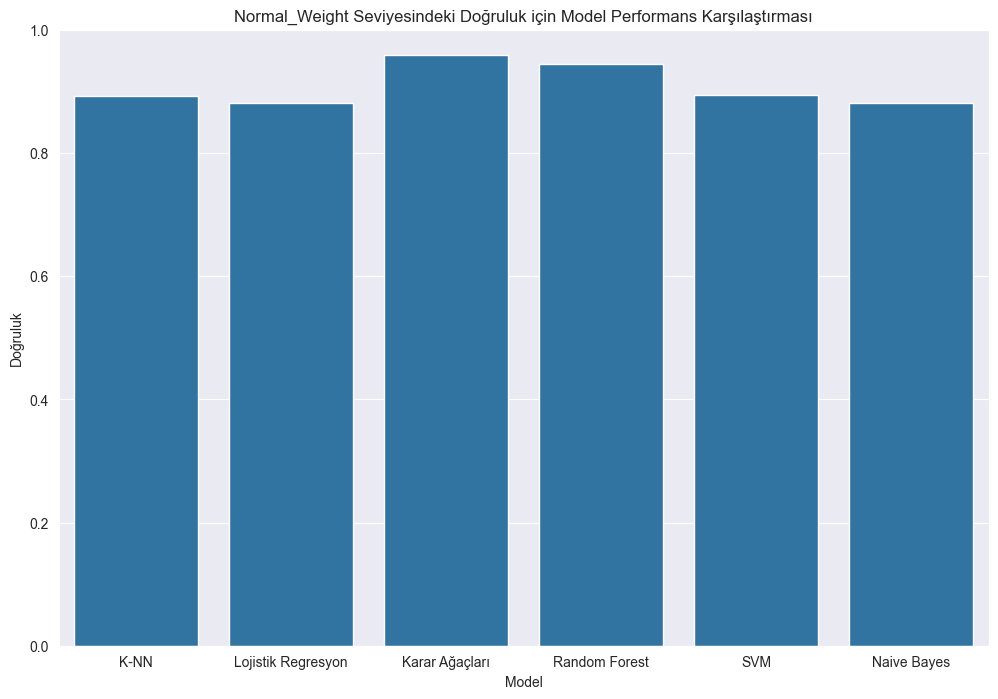

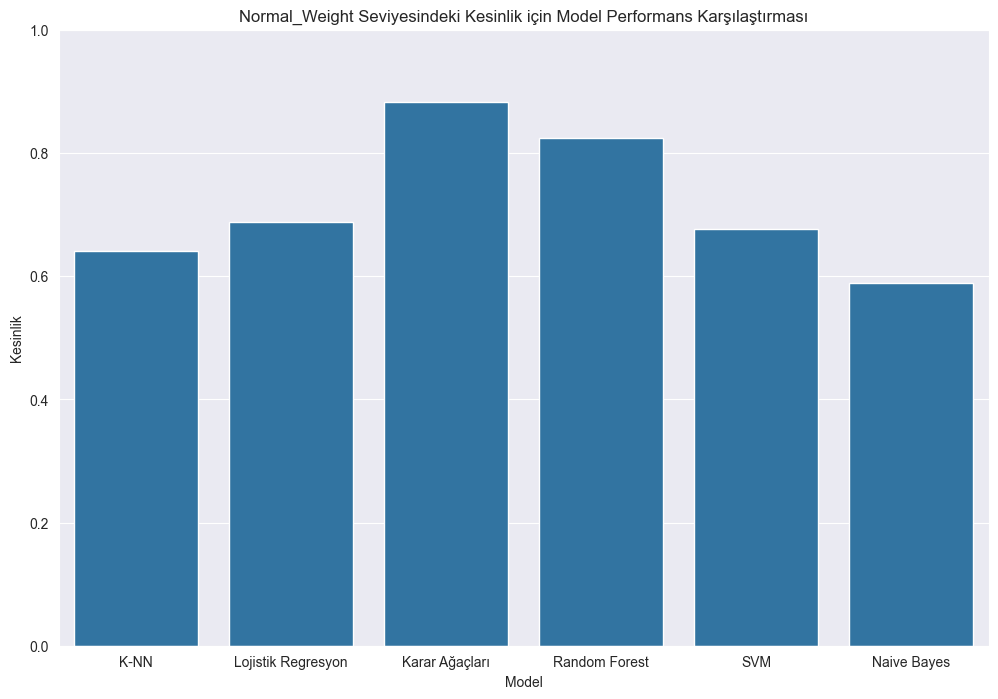

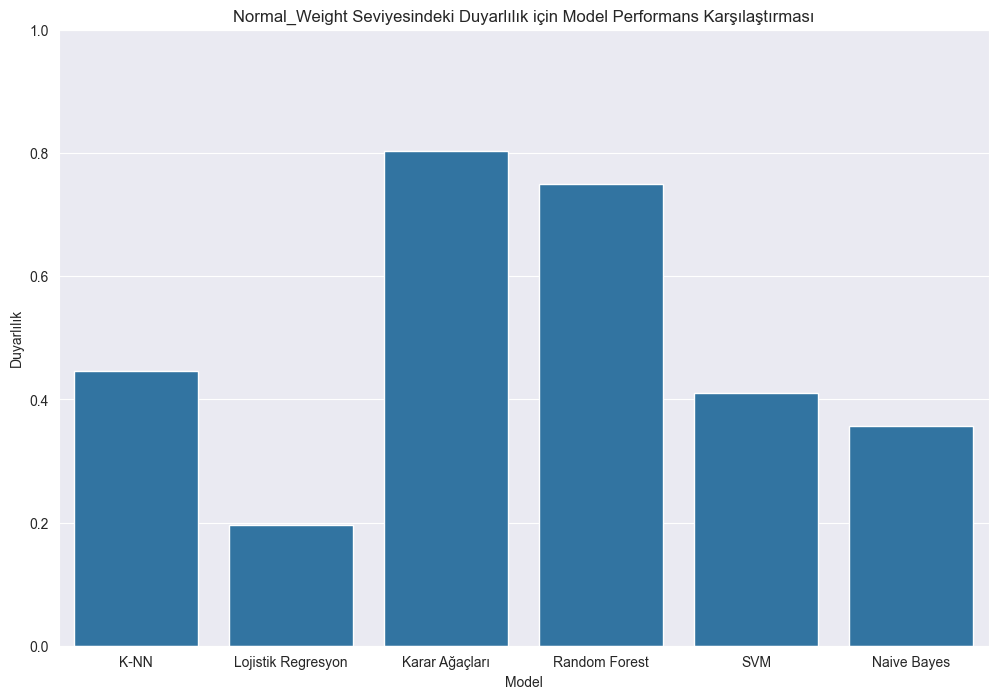

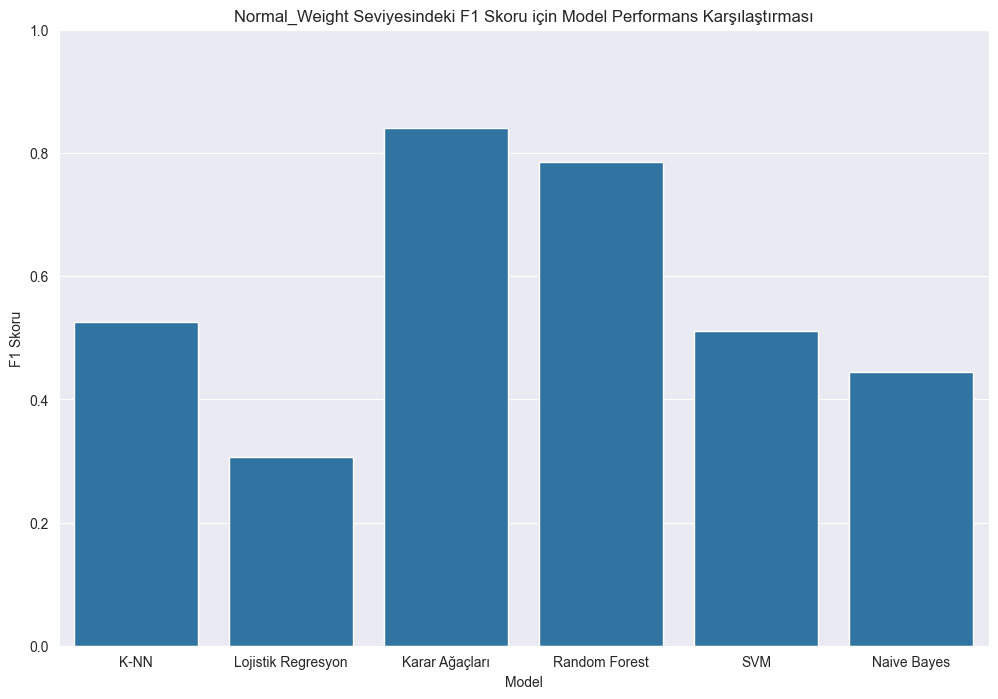

Sınıf: Overweight_Level_I
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.928230  0.782609    0.642857  0.705882
Lojistik Regresyon  0.858852  0.421053    0.142857  0.213333
Karar Ağaçları      0.959330  0.882353    0.803571  0.841121
Random Forest       0.956938  0.975000    0.696429  0.812500
SVM                 0.901914  0.894737    0.303571  0.453333
Naive Bayes         0.234450  0.145161    0.964286  0.252336


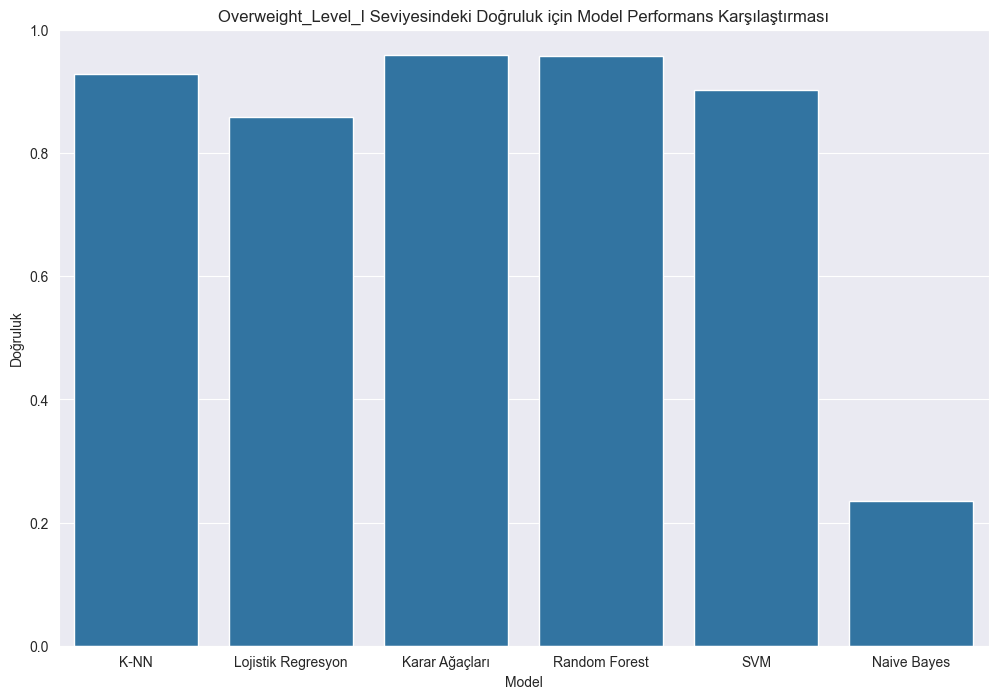

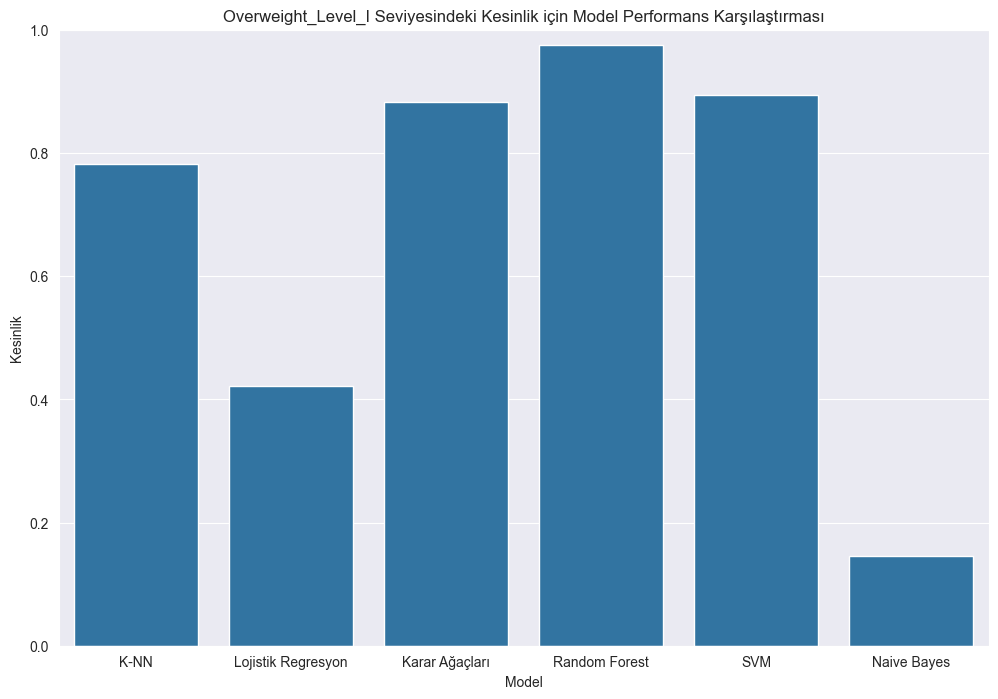

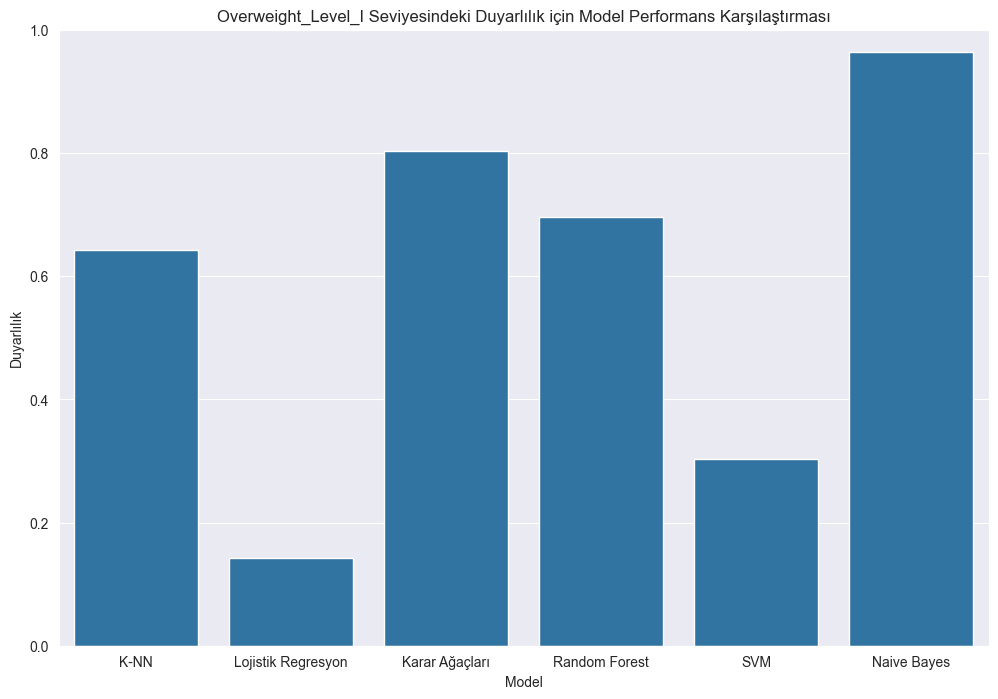

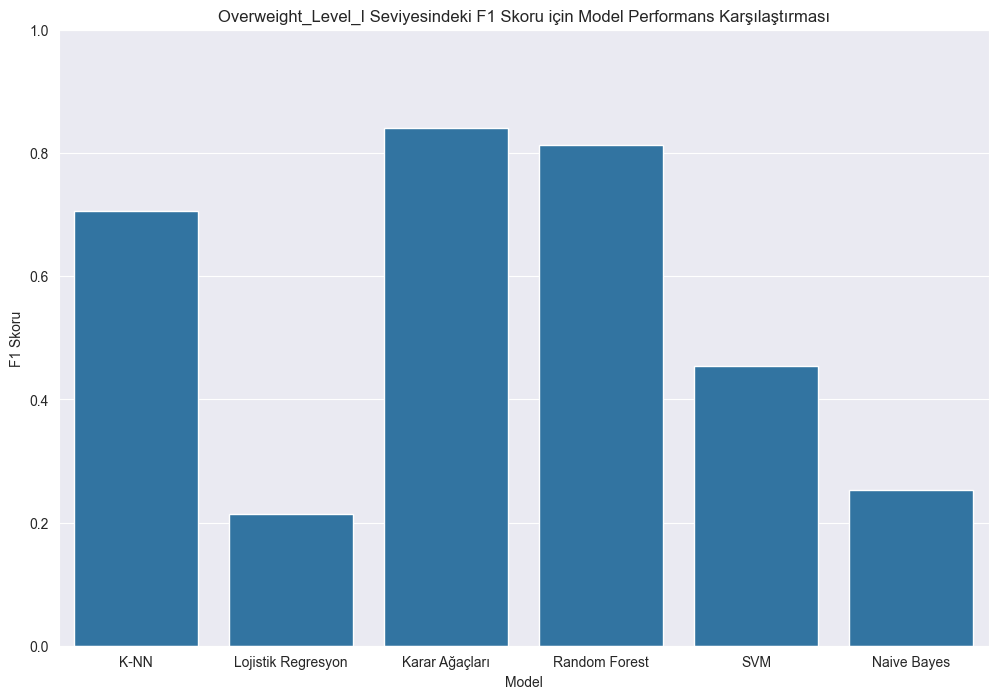

Sınıf: Overweight_Level_II
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.928230  0.750000    0.696429  0.722222
Lojistik Regresyon  0.863636  0.473684    0.160714  0.240000
Karar Ağaçları      0.964115  0.847458    0.892857  0.869565
Random Forest       0.971292  0.978261    0.803571  0.882353
SVM                 0.933014  0.868421    0.589286  0.702128
Naive Bayes         0.260766  0.151515    0.982143  0.262530


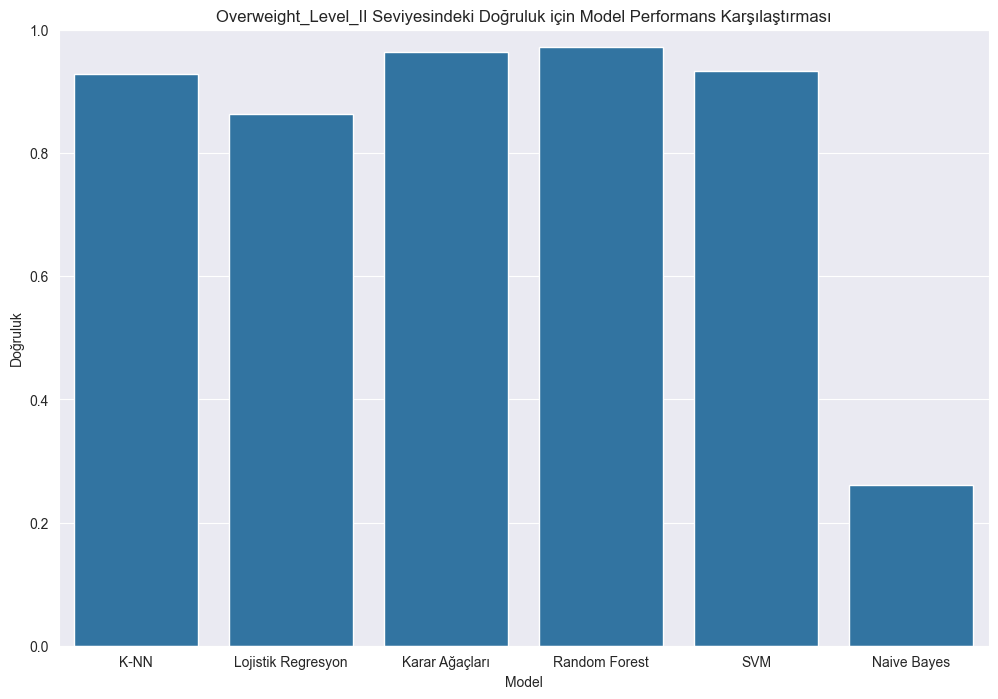

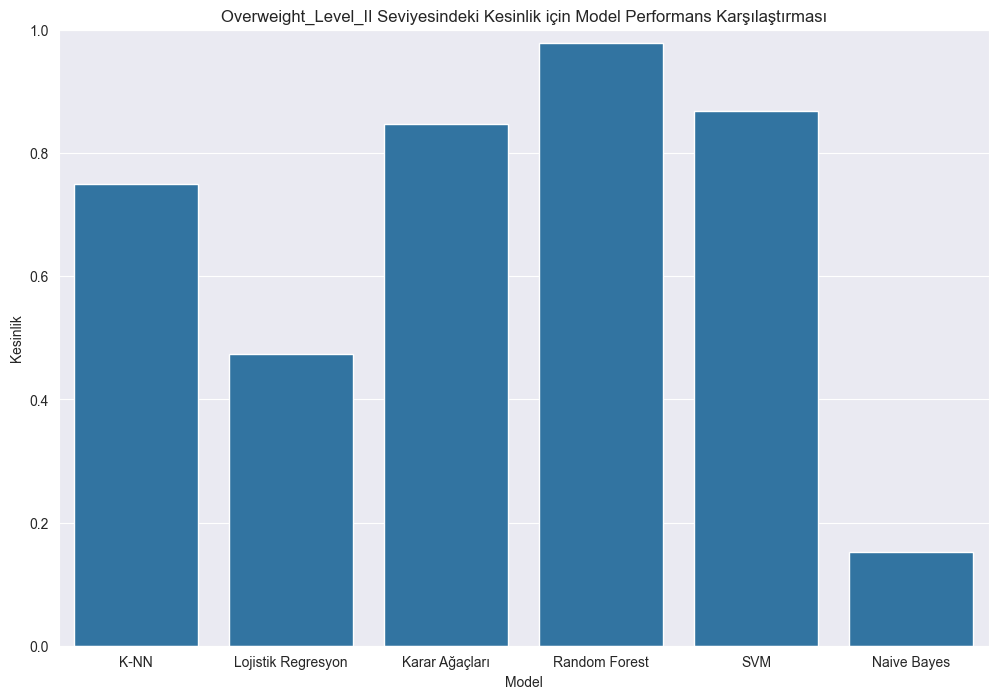

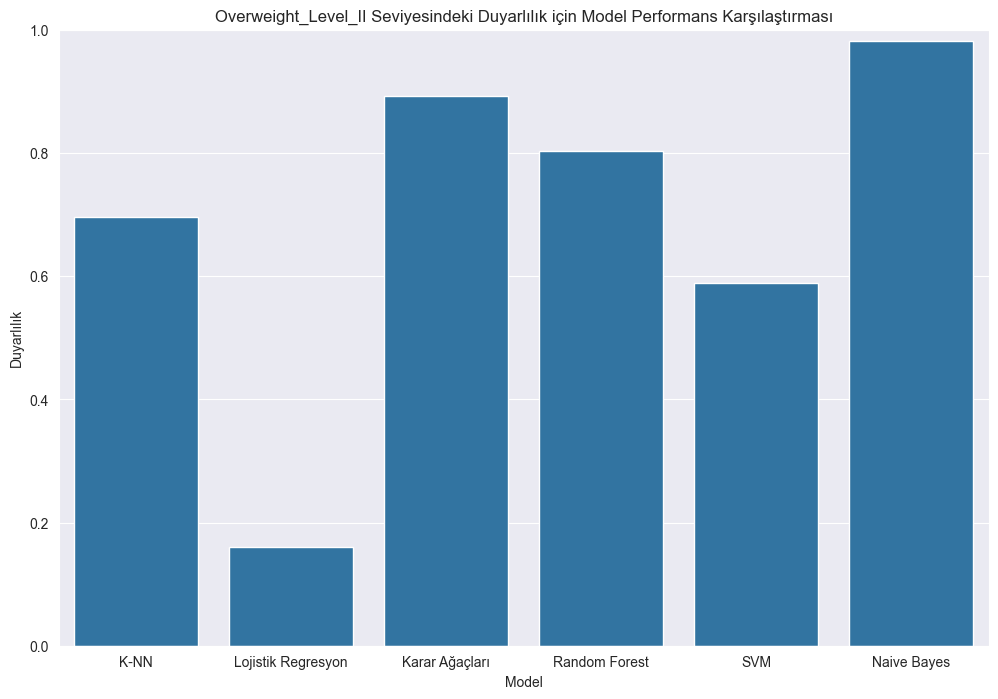

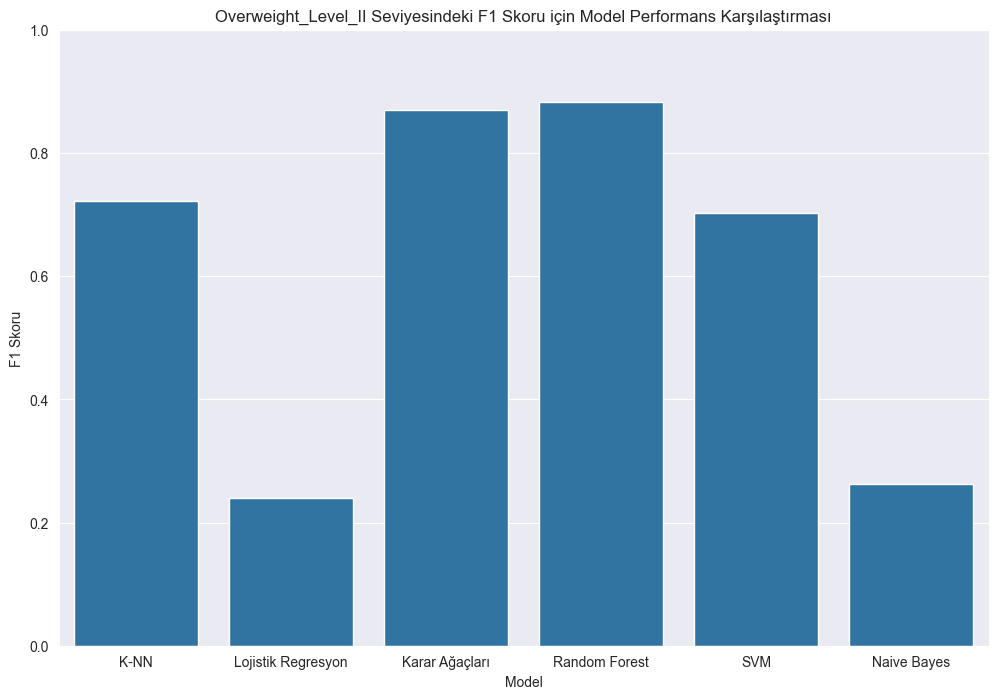

Sınıf: Obesity_Type_I
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.928230  0.796875    0.750000  0.772727
Lojistik Regresyon  0.873206  0.758621    0.323529  0.453608
Karar Ağaçları      0.971292  0.911765    0.911765  0.911765
Random Forest       0.978469  0.983607    0.882353  0.930233
SVM                 0.921053  0.948718    0.544118  0.691589
Naive Bayes         0.406699  0.207792    0.941176  0.340426


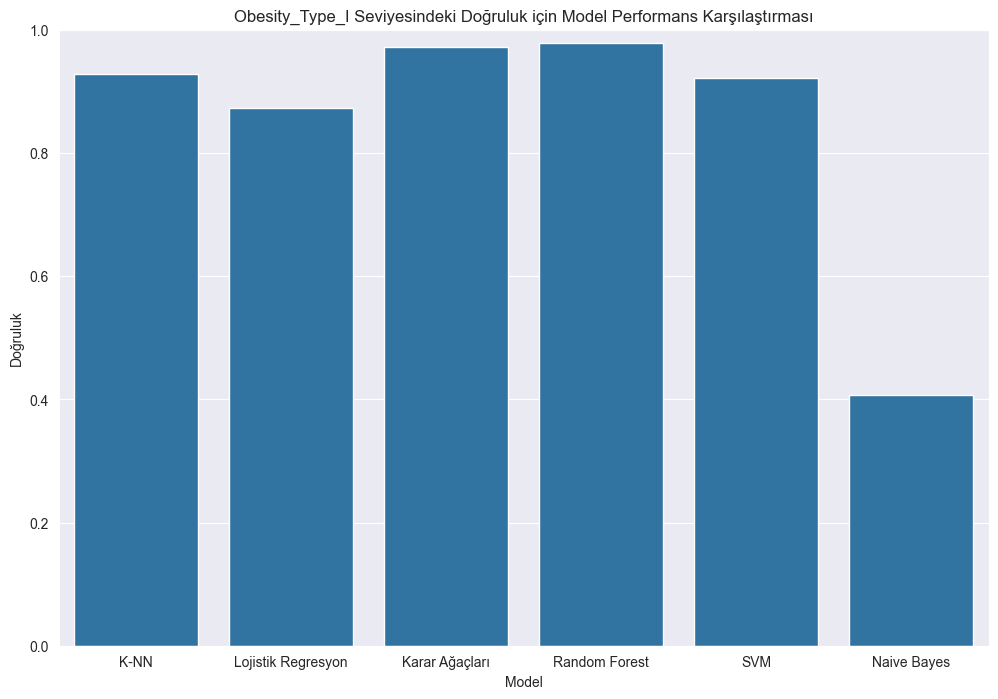

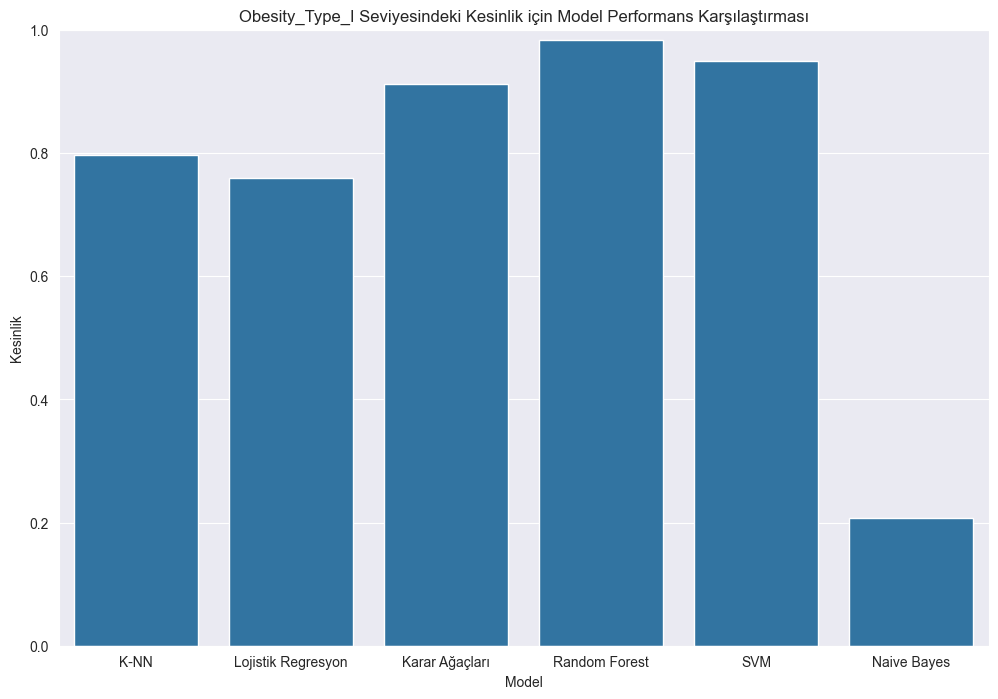

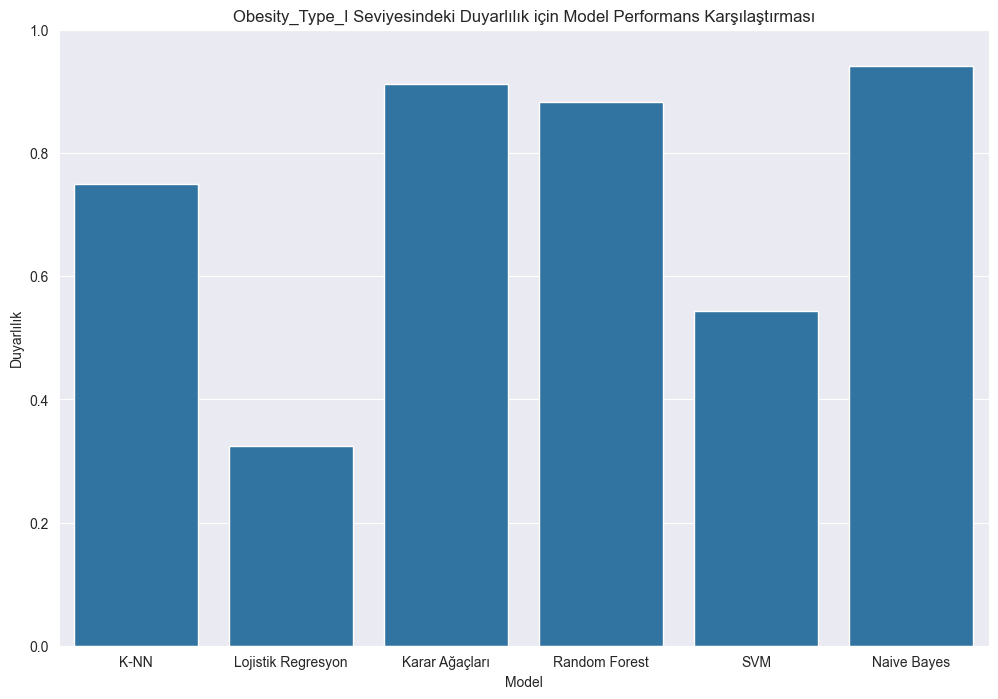

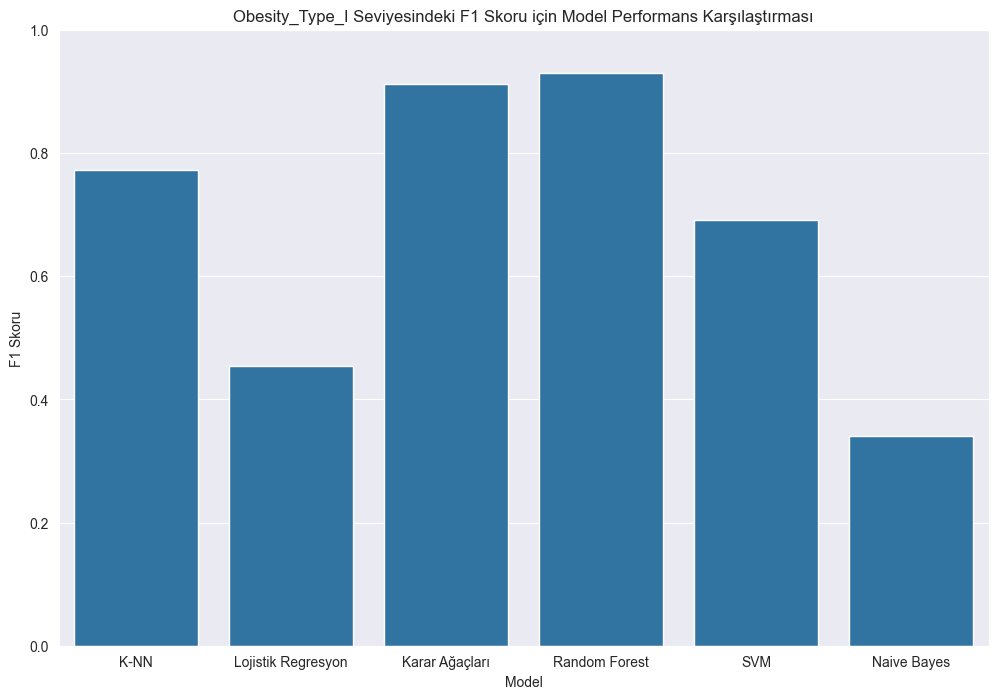

Sınıf: Insufficient_Weight
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.961722  0.844828    0.875000  0.859649
Lojistik Regresyon  0.983254  0.888889    1.000000  0.941176
Karar Ağaçları      0.983254  0.929825    0.946429  0.938053
Random Forest       0.985646  1.000000    0.892857  0.943396
SVM                 0.973684  0.924528    0.875000  0.899083
Naive Bayes         0.633971  0.263415    0.964286  0.413793


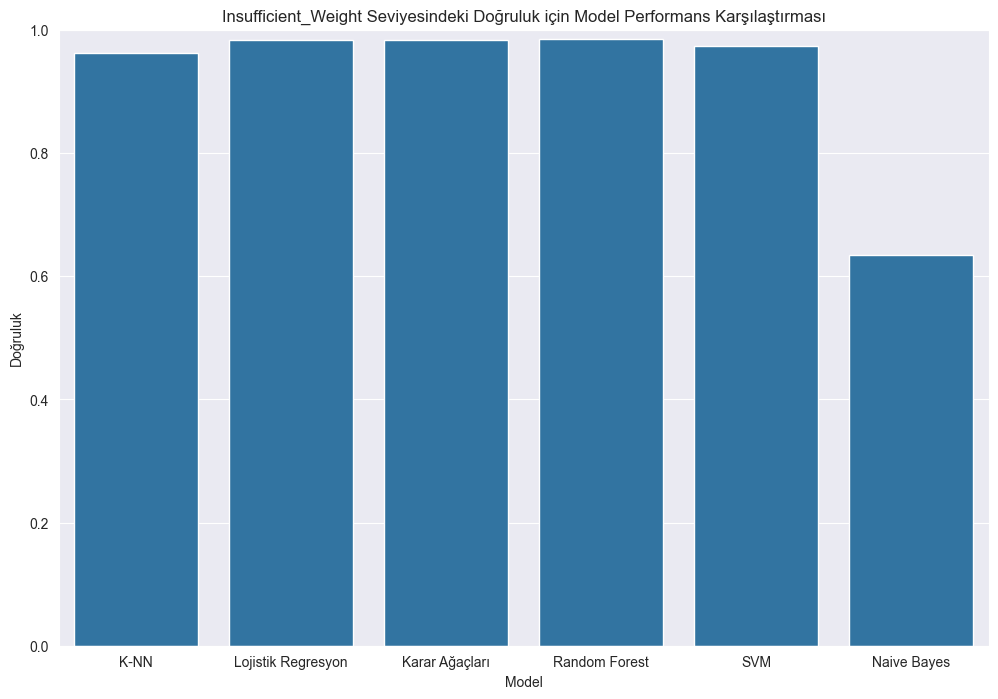

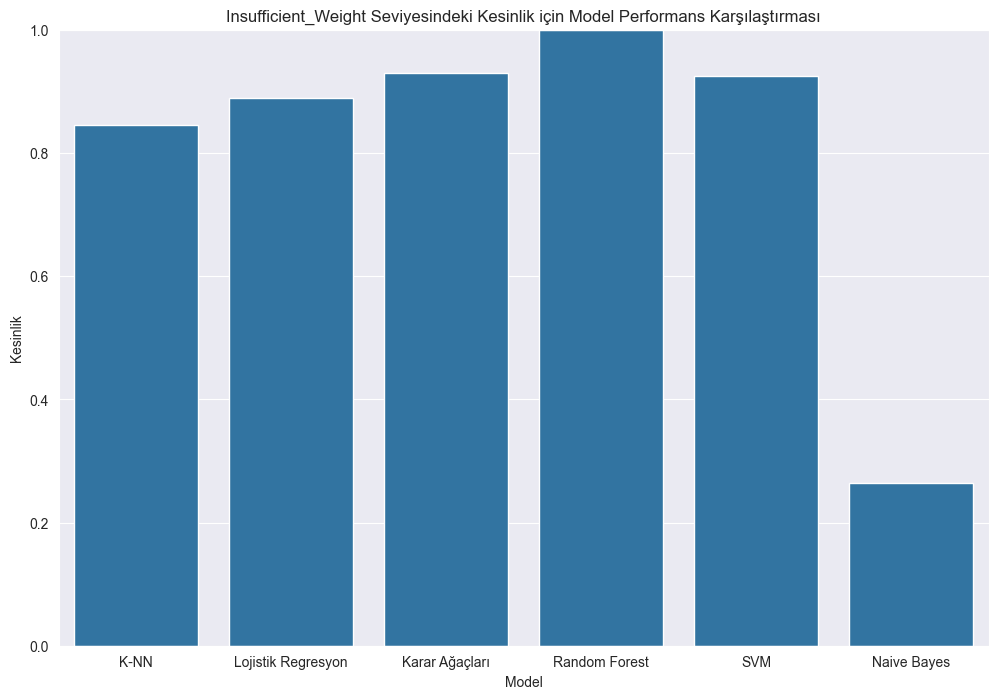

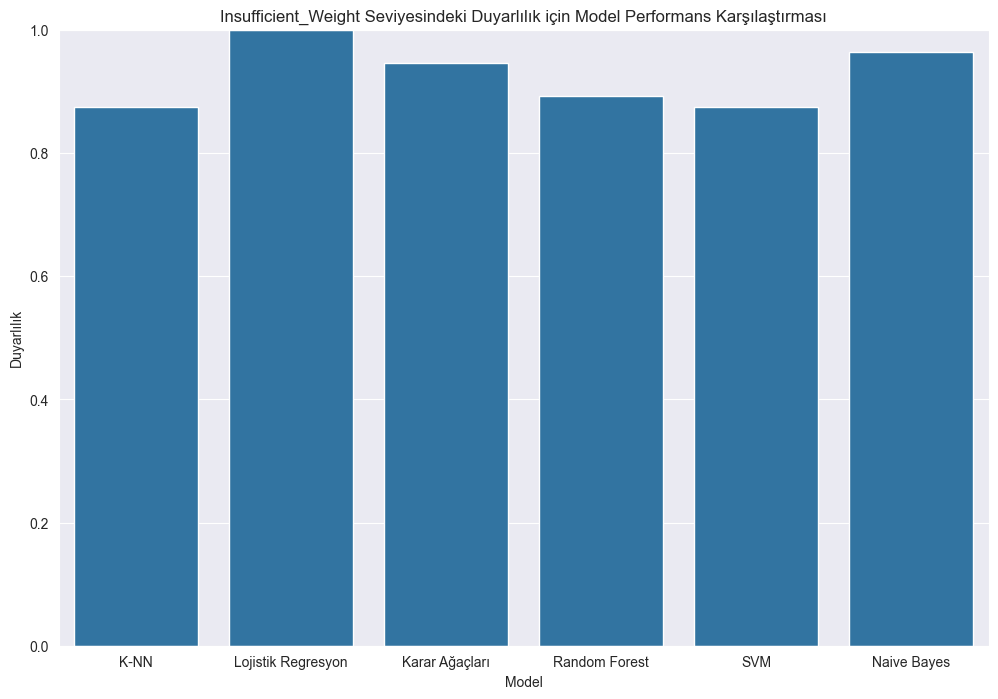

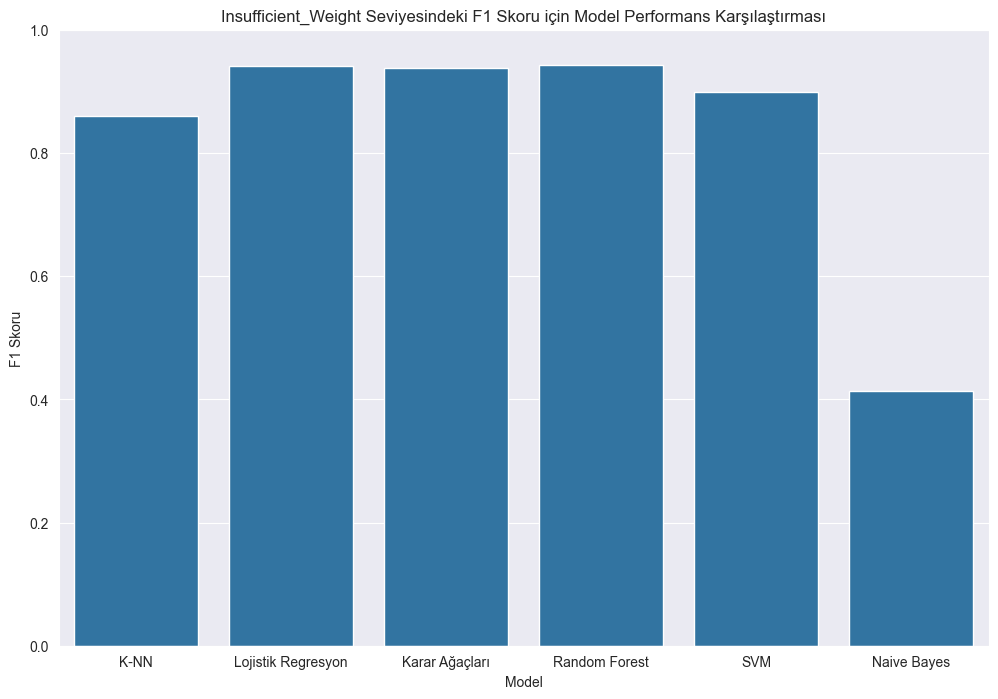

Sınıf: Obesity_Type_II
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.980861  0.920635    0.950820  0.935484
Lojistik Regresyon  0.988038  0.937500    0.983607  0.960000
Karar Ağaçları      0.995215  0.983607    0.983607  0.983607
Random Forest       0.997608  1.000000    0.983607  0.991736
SVM                 0.988038  0.937500    0.983607  0.960000
Naive Bayes         0.777512  0.394737    0.983607  0.563380


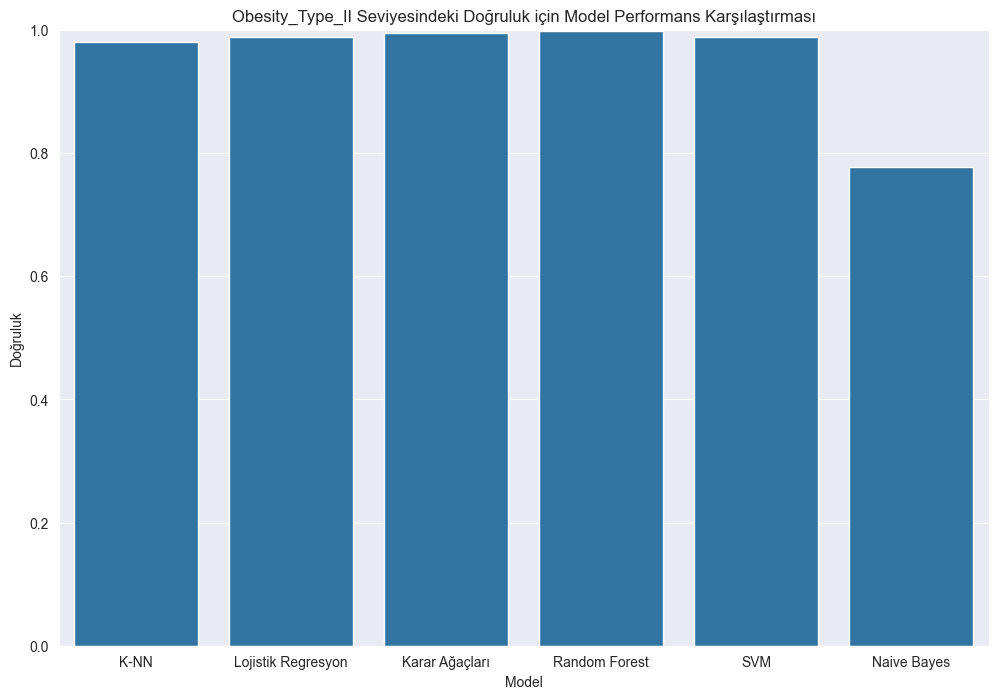

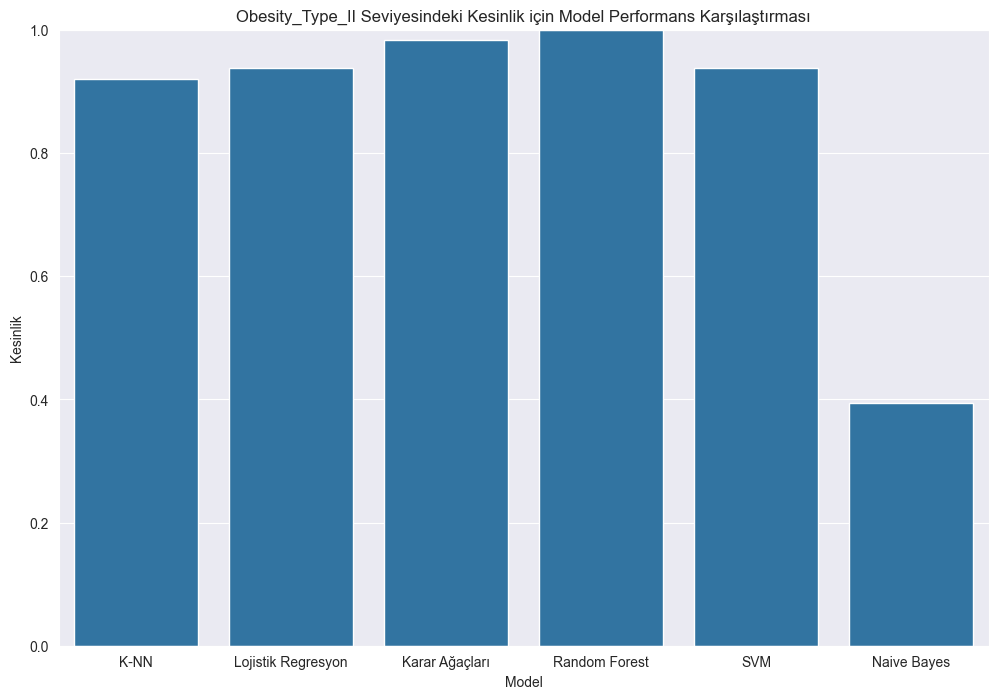

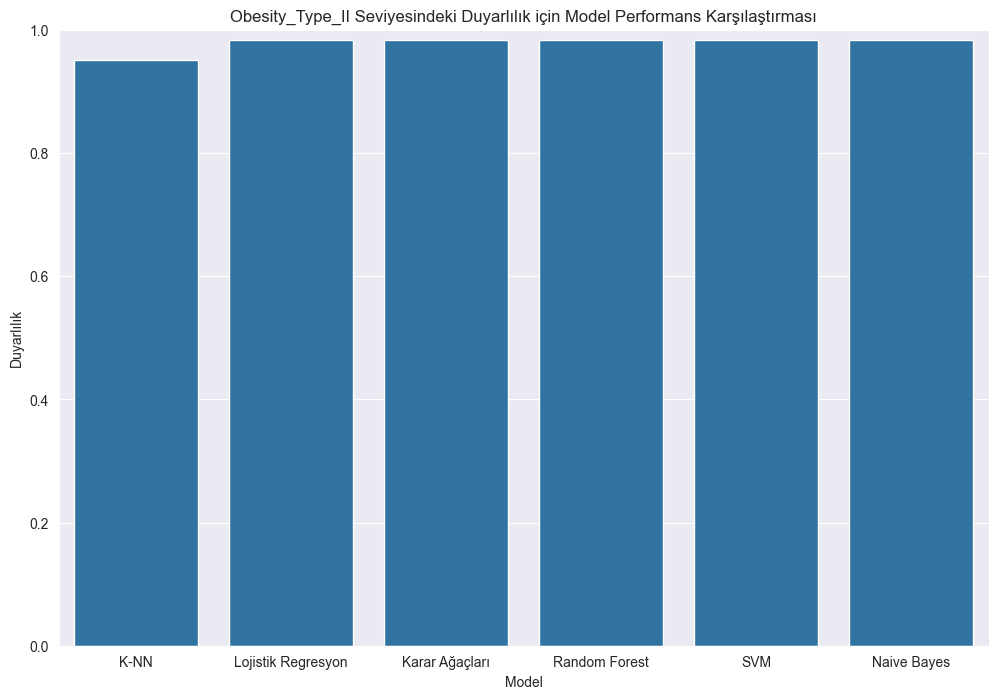

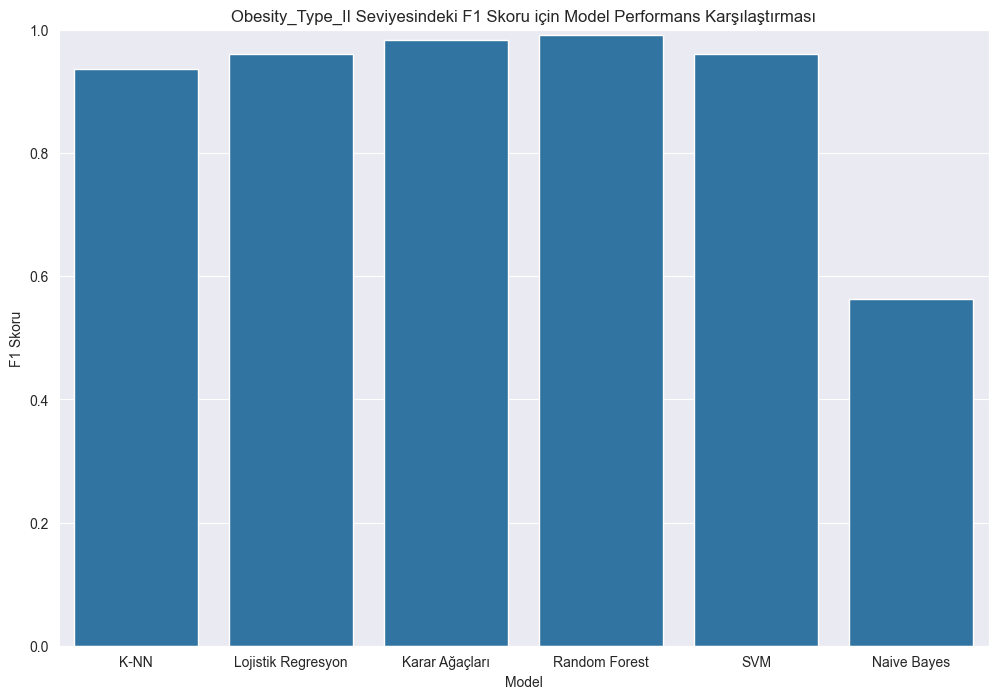

Sınıf: Obesity_Type_III
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.995215  0.970149         1.0  0.984848
Lojistik Regresyon  1.000000  1.000000         1.0  1.000000
Karar Ağaçları      1.000000  1.000000         1.0  1.000000
Random Forest       1.000000  1.000000         1.0  1.000000
SVM                 1.000000  1.000000         1.0  1.000000
Naive Bayes         0.997608  0.984848         1.0  0.992366


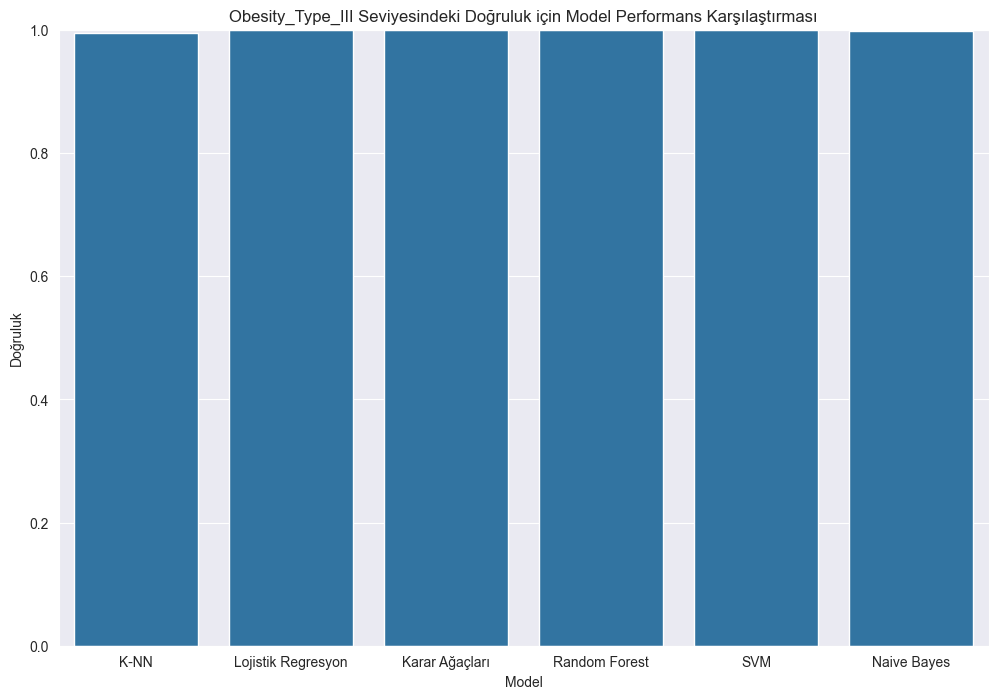

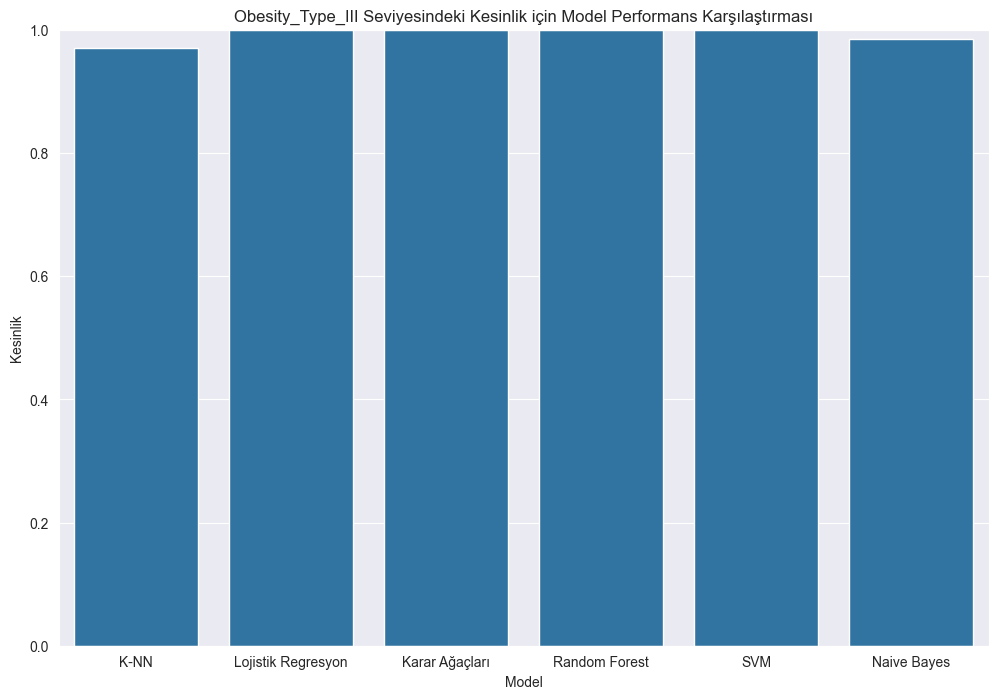

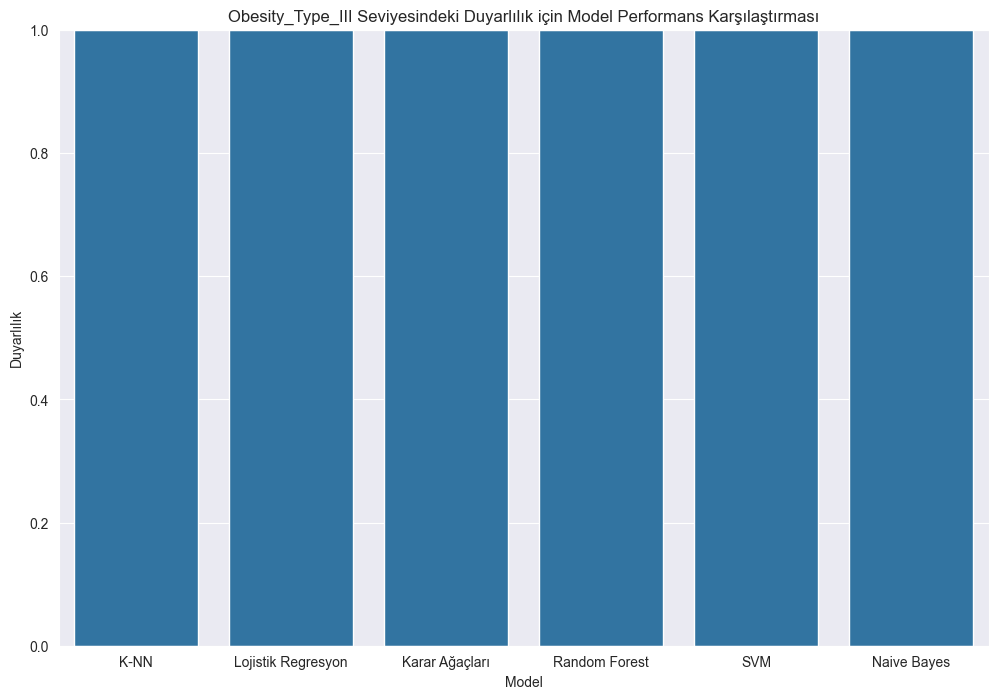

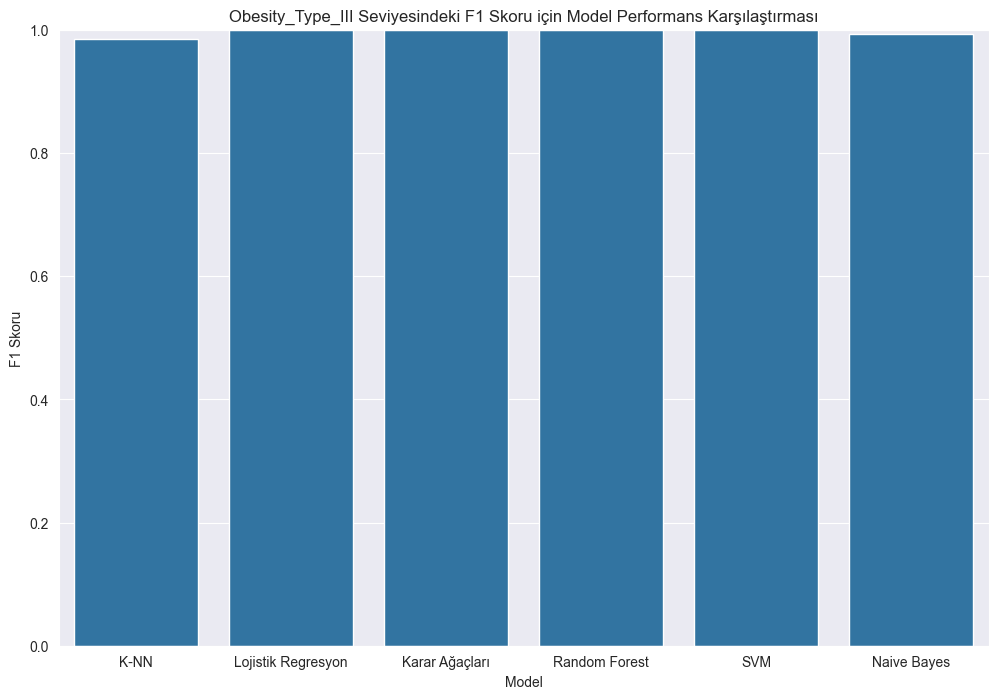

Sınıf: Hepsi için
                    Doğruluk  Kesinlik  Duyarlılık  F1 Skoru
K-NN                0.796651  0.793913    0.796651  0.793105
Lojistik Regresyon  0.854067  0.855281    0.854067  0.851261
Karar Ağaçları      0.911483  0.911194    0.911483  0.911043
Random Forest       0.918660  0.922889    0.918660  0.919471
SVM                 0.846890  0.857357    0.846890  0.847895
Naive Bayes         0.521531  0.524048    0.521531  0.468920


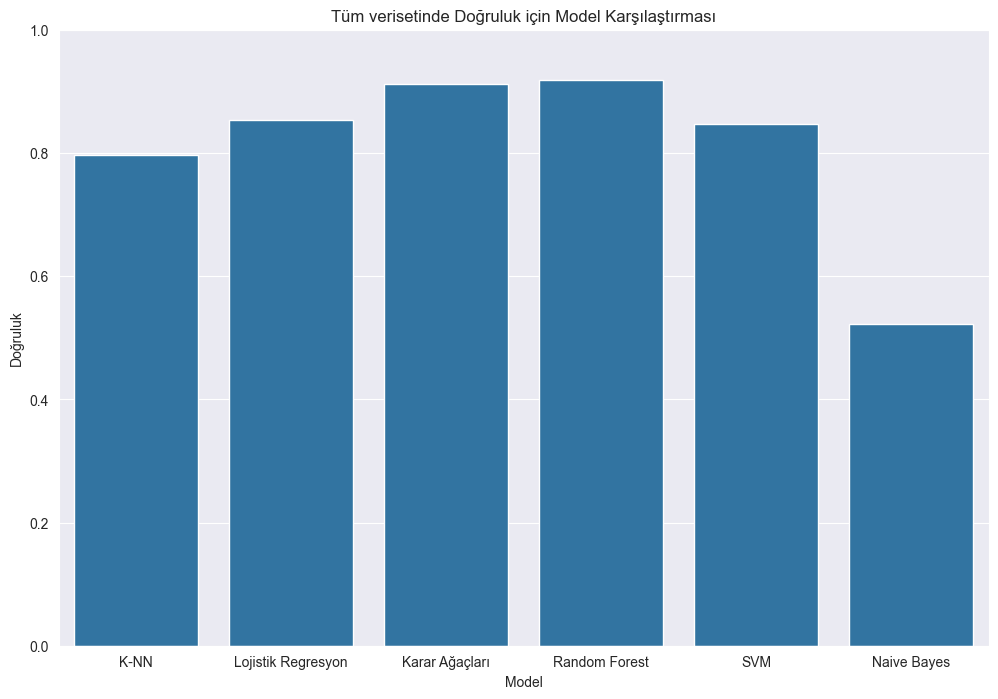

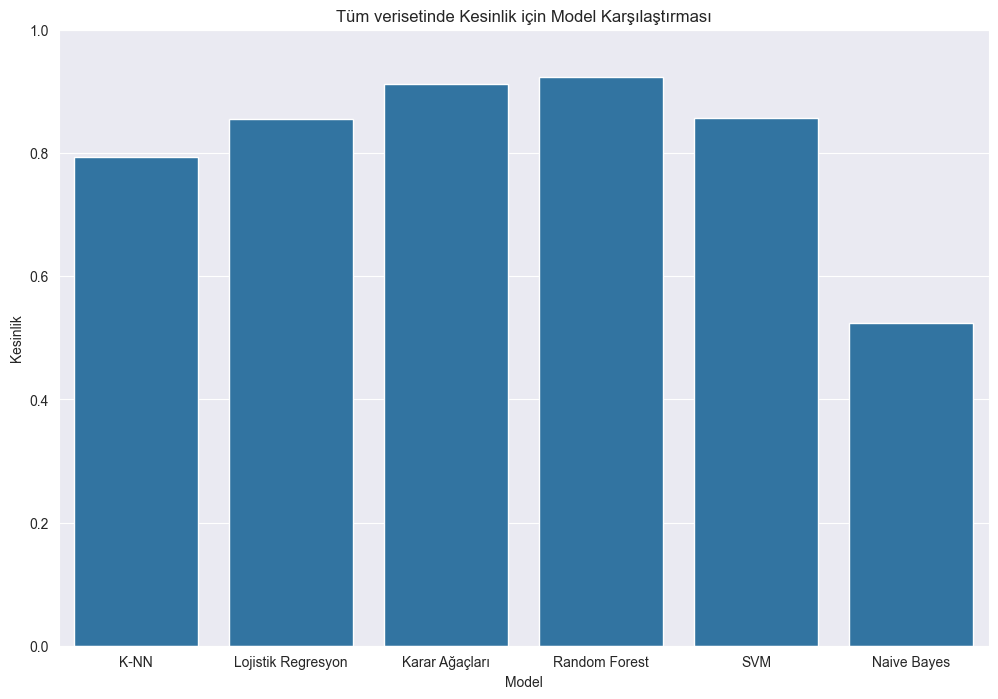

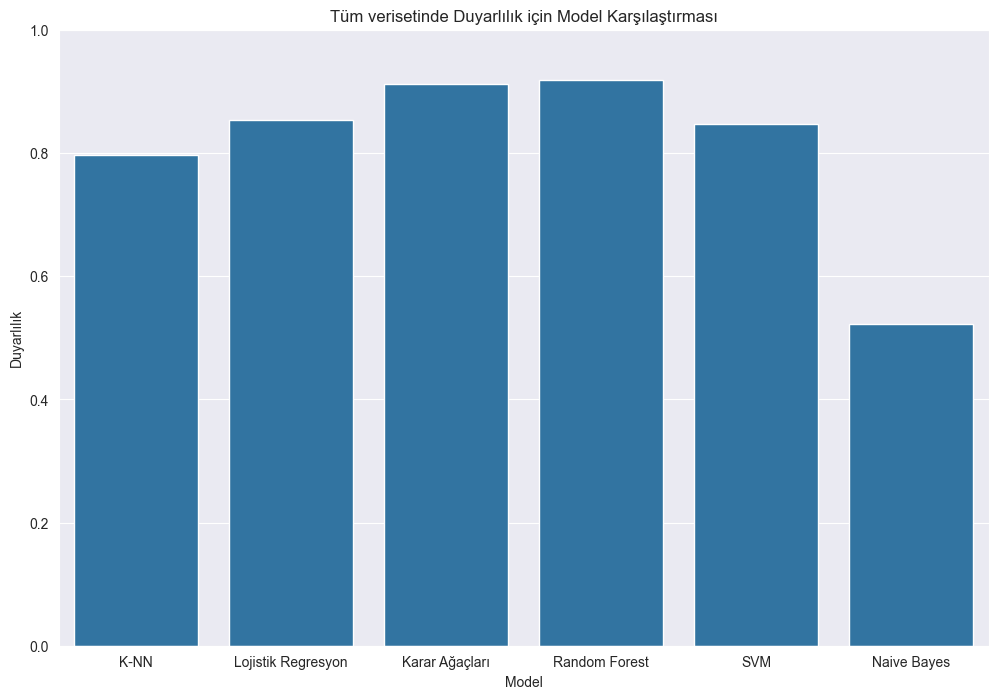

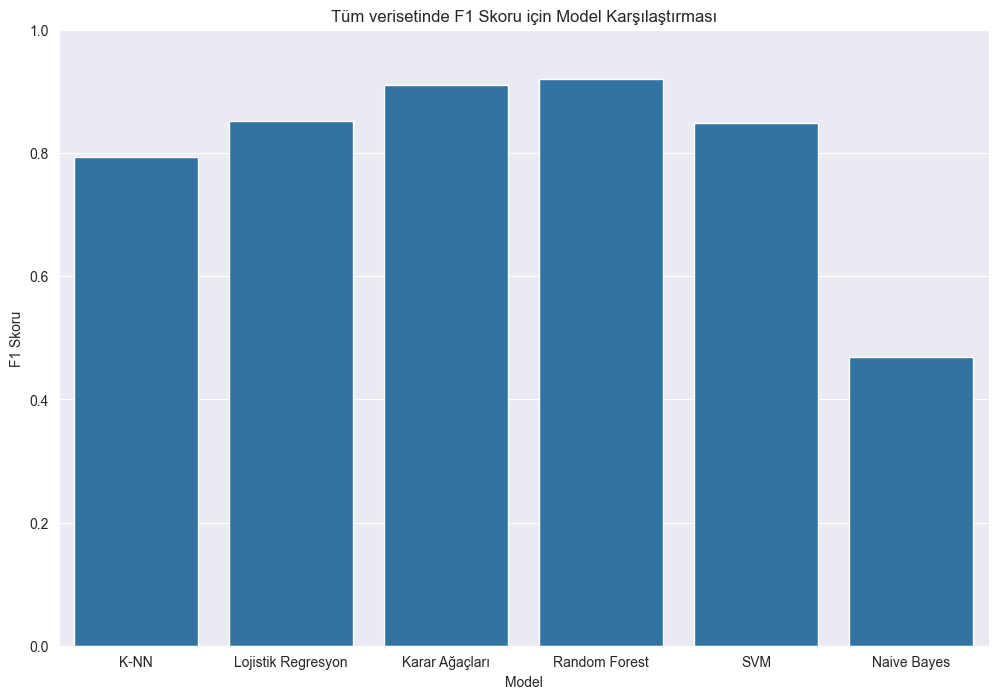

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

# Verisetini yükleme
data = pd.read_csv('TemizlenmisData.csv')

# Verisetini önişleme sokma
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Kategorik verileri 'dummy' olarak tanımlama
X = pd.get_dummies(X)

# Veriyi test ve eğitim verisi olarak ikiye ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartize etme
olctlndr = StandardScaler()
X_train = olctlndr.fit_transform(X_train)
X_test = olctlndr.transform(X_test)

# Modelleri başlatma
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'Lojistik Regresyon': LogisticRegression(max_iter=1000),
    'Karar Ağaçları': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Sonuç değişkenine göre modellerin eğitilmesi ve değerlendirilmesi
sonuclar = {}
siniflar = y.unique()

for snf in siniflar:
    sonuclar[snf] = {}
    y_train_cls = (y_train == snf).astype(int)
    y_test_cls = (y_test == snf).astype(int)

    for model_adi, model in models.items():
        model.fit(X_train, y_train_cls)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test_cls, y_pred)
        precision = precision_score(y_test_cls, y_pred)
        recall = recall_score(y_test_cls, y_pred)
        f1 = f1_score(y_test_cls, y_pred)

        sonuclar[snf][model_adi] = {
            'Doğruluk': accuracy,
            'Kesinlik': precision,
            'Duyarlılık': recall,
            'F1 Skoru': f1
        }

# Bütün veriseti için her modelin değerlendirme ölçütlerinin hesaplanması ve grafiğe dökülmesi
sonuclar['Bütün Veriseti için'] = {}

for model_adi, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    sonuclar['Bütün Veriseti için'][model_adi] = {
        'Doğruluk': accuracy,
        'Kesinlik': precision,
        'Duyarlılık': recall,
        'F1 Skoru': f1
    }

# Her sınıf için modellerin değerlendirme ölçütlerinin hesaplanması
olcutler = ['Doğruluk', 'Kesinlik', 'Duyarlılık', 'F1 Skoru']

for snf in siniflar:
    print(f"Sınıf: {snf}")
    results_df = pd.DataFrame(sonuclar[snf]).T
    print(results_df)

    for olct in olcutler:
        plt.figure(figsize=(12, 8))
        sns.barplot(x=results_df.index, y=results_df[olct])
        plt.title(f'{snf} Seviyesindeki {olct} için Model Performans Karşılaştırması')
        plt.xlabel('Model')
        plt.ylabel(olct)
        plt.ylim(0, 1)
        # Oluşturulan grafikleri .png olarak kaydetmek için alt satırdaki kare işaretini silin
        #plt.savefig(f'{snf}_{olct}.png')
        plt.show()

print("Sınıf: Hepsi için")
butundataset_df = pd.DataFrame(sonuclar['Bütün Veriseti için']).T
print(butundataset_df)

for olct in olcutler:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=butundataset_df.index, y=butundataset_df[olct])
    plt.title(f'Tüm verisetinde {olct} için Model Karşılaştırması')
    plt.xlabel('Model')
    plt.ylabel(olct)
    plt.ylim(0, 1)
    # Oluşturulan grafikleri .png olarak kaydetmek için alt satırdaki kare işaretini silin
    #plt.savefig(f'butun_dataset_{olct}.png')
    plt.show()
